# Import neccessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read Data Using Pandas

In [2]:
core_data = pd.read_excel(r"C:\Users\OMO_MUSHIN\Documents\Volve-Core_Data_2.xlsx", na_values=' ')
core_data.head()

CORE_NO  Sample    Depth  CKGH INV_PMH   CKH  CKGV INV_PMV   CKV  CPOR  \
0      NaN     NaN      NaN   NaN     NaN   NaN   NaN     NaN   NaN   NaN   
1      NaN     NaN      NaN   NaN     NaN   NaN   NaN     NaN   NaN   NaN   
2      1.0     1.0  3837.00  13.8   0.662  11.5                        17   
3      1.0     2.0  3837.25   NaN           NaN                      14.8   
4      1.0     3.0  3837.55  25.2   0.746  21.4  3.94   0.495  3.16  10.8   

  CPOR_VERT SUM_POR   So   Sw  RHOD GRAIN_RHO  \
0       NaN     NaN  NaN  NaN   NaN       NaN   
1       NaN     NaN  NaN  NaN   NaN       NaN   
2                              2.66             
3                              2.67             
4                              2.69             

                            Lithological description  
0                                                NaN  
1                                                NaN  
2  Sst.lt-Brn.M-gr.Ang.W-cmt.Fr-srt.mtrx.frac.w/M...  
3         A.A.fis.Cl/Mic-lam.w/o frac.w/Dol,Sid,Cl.   
4           A.A.VW-cmt.w/o fis.Cl/Mic-lam.incr Dol.

# Exploratory Data Analysis 

In [3]:
indexes_to_drop =[0, 1]

core_data.drop(index=indexes_to_drop, inplace=True)
core_data.drop(['Lithological description', 'CORE_NO', 'Sample'], axis=1, inplace=True)
# core_data.drop(['Lithological description',  'INV_PMH',\
#                 'INV_PMV','CKGV','CKGH', 'CKV', 'CPOR_VERT', 'SUM_POR', 'GRAIN_RHO',\
#                'So', 'Sw'], axis=1, inplace=True)
core_data.reset_index()

core_data.head()


Depth  CKGH INV_PMH    CKH  CKGV INV_PMV   CKV  CPOR CPOR_VERT SUM_POR  \
2  3837.00  13.8   0.662   11.5                        17                     
3  3837.25   NaN            NaN                      14.8                     
4  3837.55  25.2   0.746   21.4  3.94   0.495  3.16  10.8                     
5  3837.80  1.02   0.495  0.694                      12.8                     
6  3837.88                                                     18.8           

     So    Sw  RHOD GRAIN_RHO  
2              2.66            
3              2.67            
4              2.69            
5               2.7            
6  52.9  36.4            2.68

In [4]:
# Converting all data to numeric data
core_data = core_data.apply(pd.to_numeric, errors='coerce')


# Summary statistics
core_data.describe().T

count         mean          std       min       25%       50%  \
Depth      728.0  3920.153338    46.902816  3837.000  3881.980  3921.125   
CKGH       557.0   649.801463  2160.127387     0.018     2.620    59.900   
INV_PMH    557.0     0.765614     0.207490     0.495     0.495     0.855   
CKH        557.0   627.972549  2116.307023     0.010     2.030    52.300   
CKGV       141.0   490.086071  1973.601098     0.030     0.874    27.300   
INV_PMV    141.0     0.724369     0.203974     0.495     0.495     0.746   
CKV        141.0   472.875284  1929.420018     0.017     0.590    23.300   
CPOR       593.0    16.829342     6.552523     2.900    12.000    18.100   
CPOR_VERT   71.0    19.497183     5.657763     2.700    18.150    21.200   
SUM_POR      0.0          NaN          NaN       NaN       NaN       NaN   
So          71.0    56.943662    21.084319     0.000    52.000    62.300   
Sw          71.0    28.309859    19.203758     4.500    18.200    22.800   
RHOD       594.0     2.653569     0.046735     2.250     2.640     2.650   
GRAIN_RHO   71.0     2.656901     0.035560     2.620     2.630     2.650   

                 75%        max  
Depth      3960.4875   3999.750  
CKGH        213.0000  20800.000  
INV_PMH       0.9670      0.999  
CKH         194.0000  20500.000  
CKGV        108.0000  14800.000  
INV_PMV       0.9070      0.999  
CKV          96.3000  14500.000  
CPOR         21.7000     36.000  
CPOR_VERT    23.5000     27.800  
SUM_POR          NaN        NaN  
So           68.5000     86.000  
Sw           29.9500     90.800  
RHOD          2.6600      3.030  
GRAIN_RHO     2.6600      2.810

In [5]:
# Check for missing values
core_data.isnull().sum()

Depth          0
CKGH         171
INV_PMH      171
CKH          171
CKGV         587
INV_PMV      587
CKV          587
CPOR         135
CPOR_VERT    657
SUM_POR      728
So           657
Sw           657
RHOD         134
GRAIN_RHO    657
dtype: int64

In [6]:
# Getting the number of Null Values for each columns
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 2 to 729
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      728 non-null    float64
 1   CKGH       557 non-null    float64
 2   INV_PMH    557 non-null    float64
 3   CKH        557 non-null    float64
 4   CKGV       141 non-null    float64
 5   INV_PMV    141 non-null    float64
 6   CKV        141 non-null    float64
 7   CPOR       593 non-null    float64
 8   CPOR_VERT  71 non-null     float64
 9   SUM_POR    0 non-null      float64
 10  So         71 non-null     float64
 11  Sw         71 non-null     float64
 12  RHOD       594 non-null    float64
 13  GRAIN_RHO  71 non-null     float64
dtypes: float64(14)
memory usage: 79.8 KB


Started histogram
Stopped


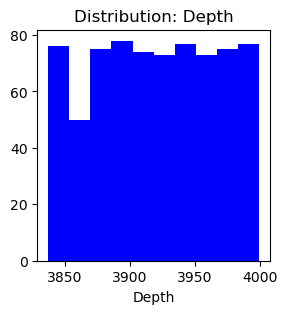

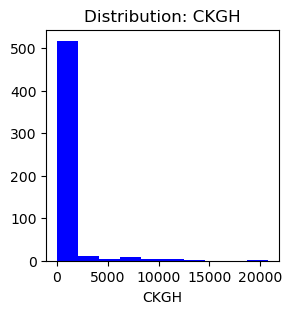

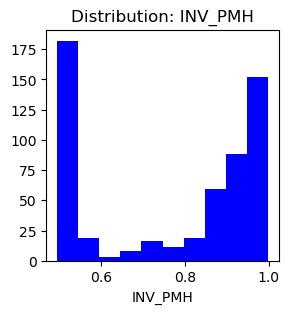

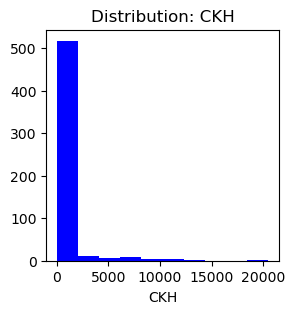

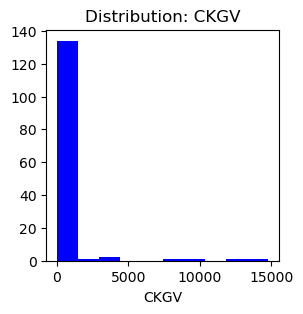

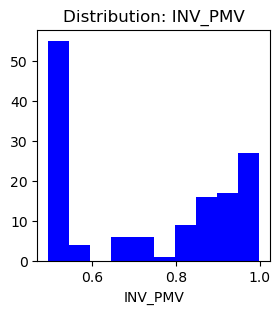

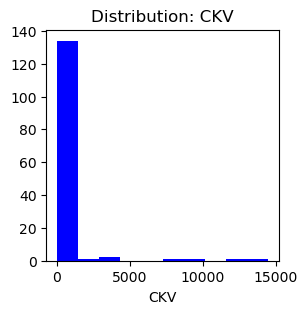

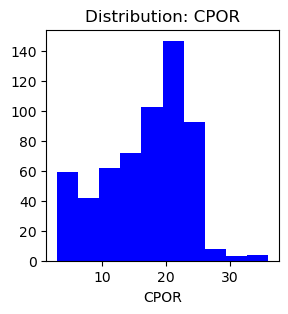

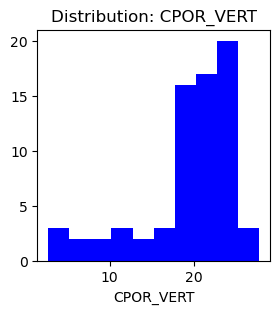

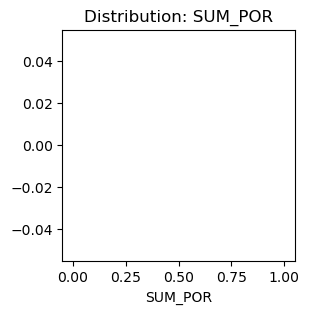

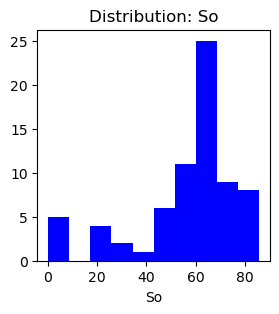

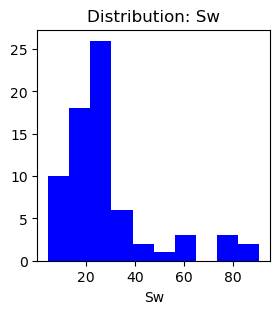

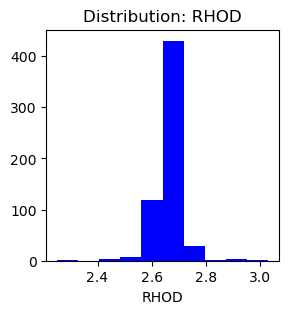

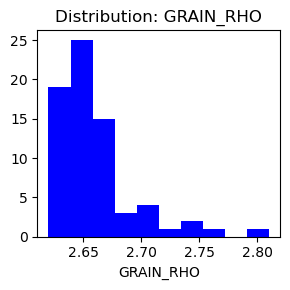

In [7]:
hue_color = 'blue'
print('Started histogram')

for col in core_data.columns.values:
    fig, axes = plt.subplots(figsize=(3, 3))
    
    # Drop NaN values before plotting the histogram
    histplot_data = core_data[col].dropna()
    
    plt.hist(histplot_data, color=hue_color)
    axes.set_xlabel(col)
    axes.set_title('Distribution: {}'.format(col))
    
plt.tight_layout()

print('Stopped')


Columns 'INV_PMH','INV_PMV','CKGV','CKGH', 'CPOR_VERT', 'SUM_POR' are labouratory parameters and henced should be dropped since we intend on using reservoir parameters to estimate permeability

In [8]:
# Dropping columns containing labouratory parameters

core_data.drop(['INV_PMH',\
                'INV_PMV','CKGV','CKGH', 'CPOR_VERT', 'SUM_POR'], axis=1, inplace=True)
core_data.set_index('Depth')
core_data

Depth       CKH     CKV  CPOR    So    Sw  RHOD  GRAIN_RHO
2    3837.00    11.500     NaN  17.0   NaN   NaN  2.66        NaN
3    3837.25       NaN     NaN  14.8   NaN   NaN  2.67        NaN
4    3837.55    21.400    3.16  10.8   NaN   NaN  2.69        NaN
5    3837.80     0.694     NaN  12.8   NaN   NaN  2.70        NaN
6    3837.88       NaN     NaN   NaN  52.9  36.4   NaN       2.68
..       ...       ...     ...   ...   ...   ...   ...        ...
725  3998.85  4850.000     NaN  28.9   NaN   NaN  2.65        NaN
726  3999.00  3350.000     NaN  20.7   NaN   NaN  2.66        NaN
727  3999.25  3490.000     NaN  20.9   NaN   NaN  2.64        NaN
728  3999.50   163.000  448.00  17.3   NaN   NaN  2.64        NaN
729  3999.75   805.000     NaN  18.5   NaN   NaN  2.64        NaN

[728 rows x 8 columns]

C:\Users\OMO_MUSHIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


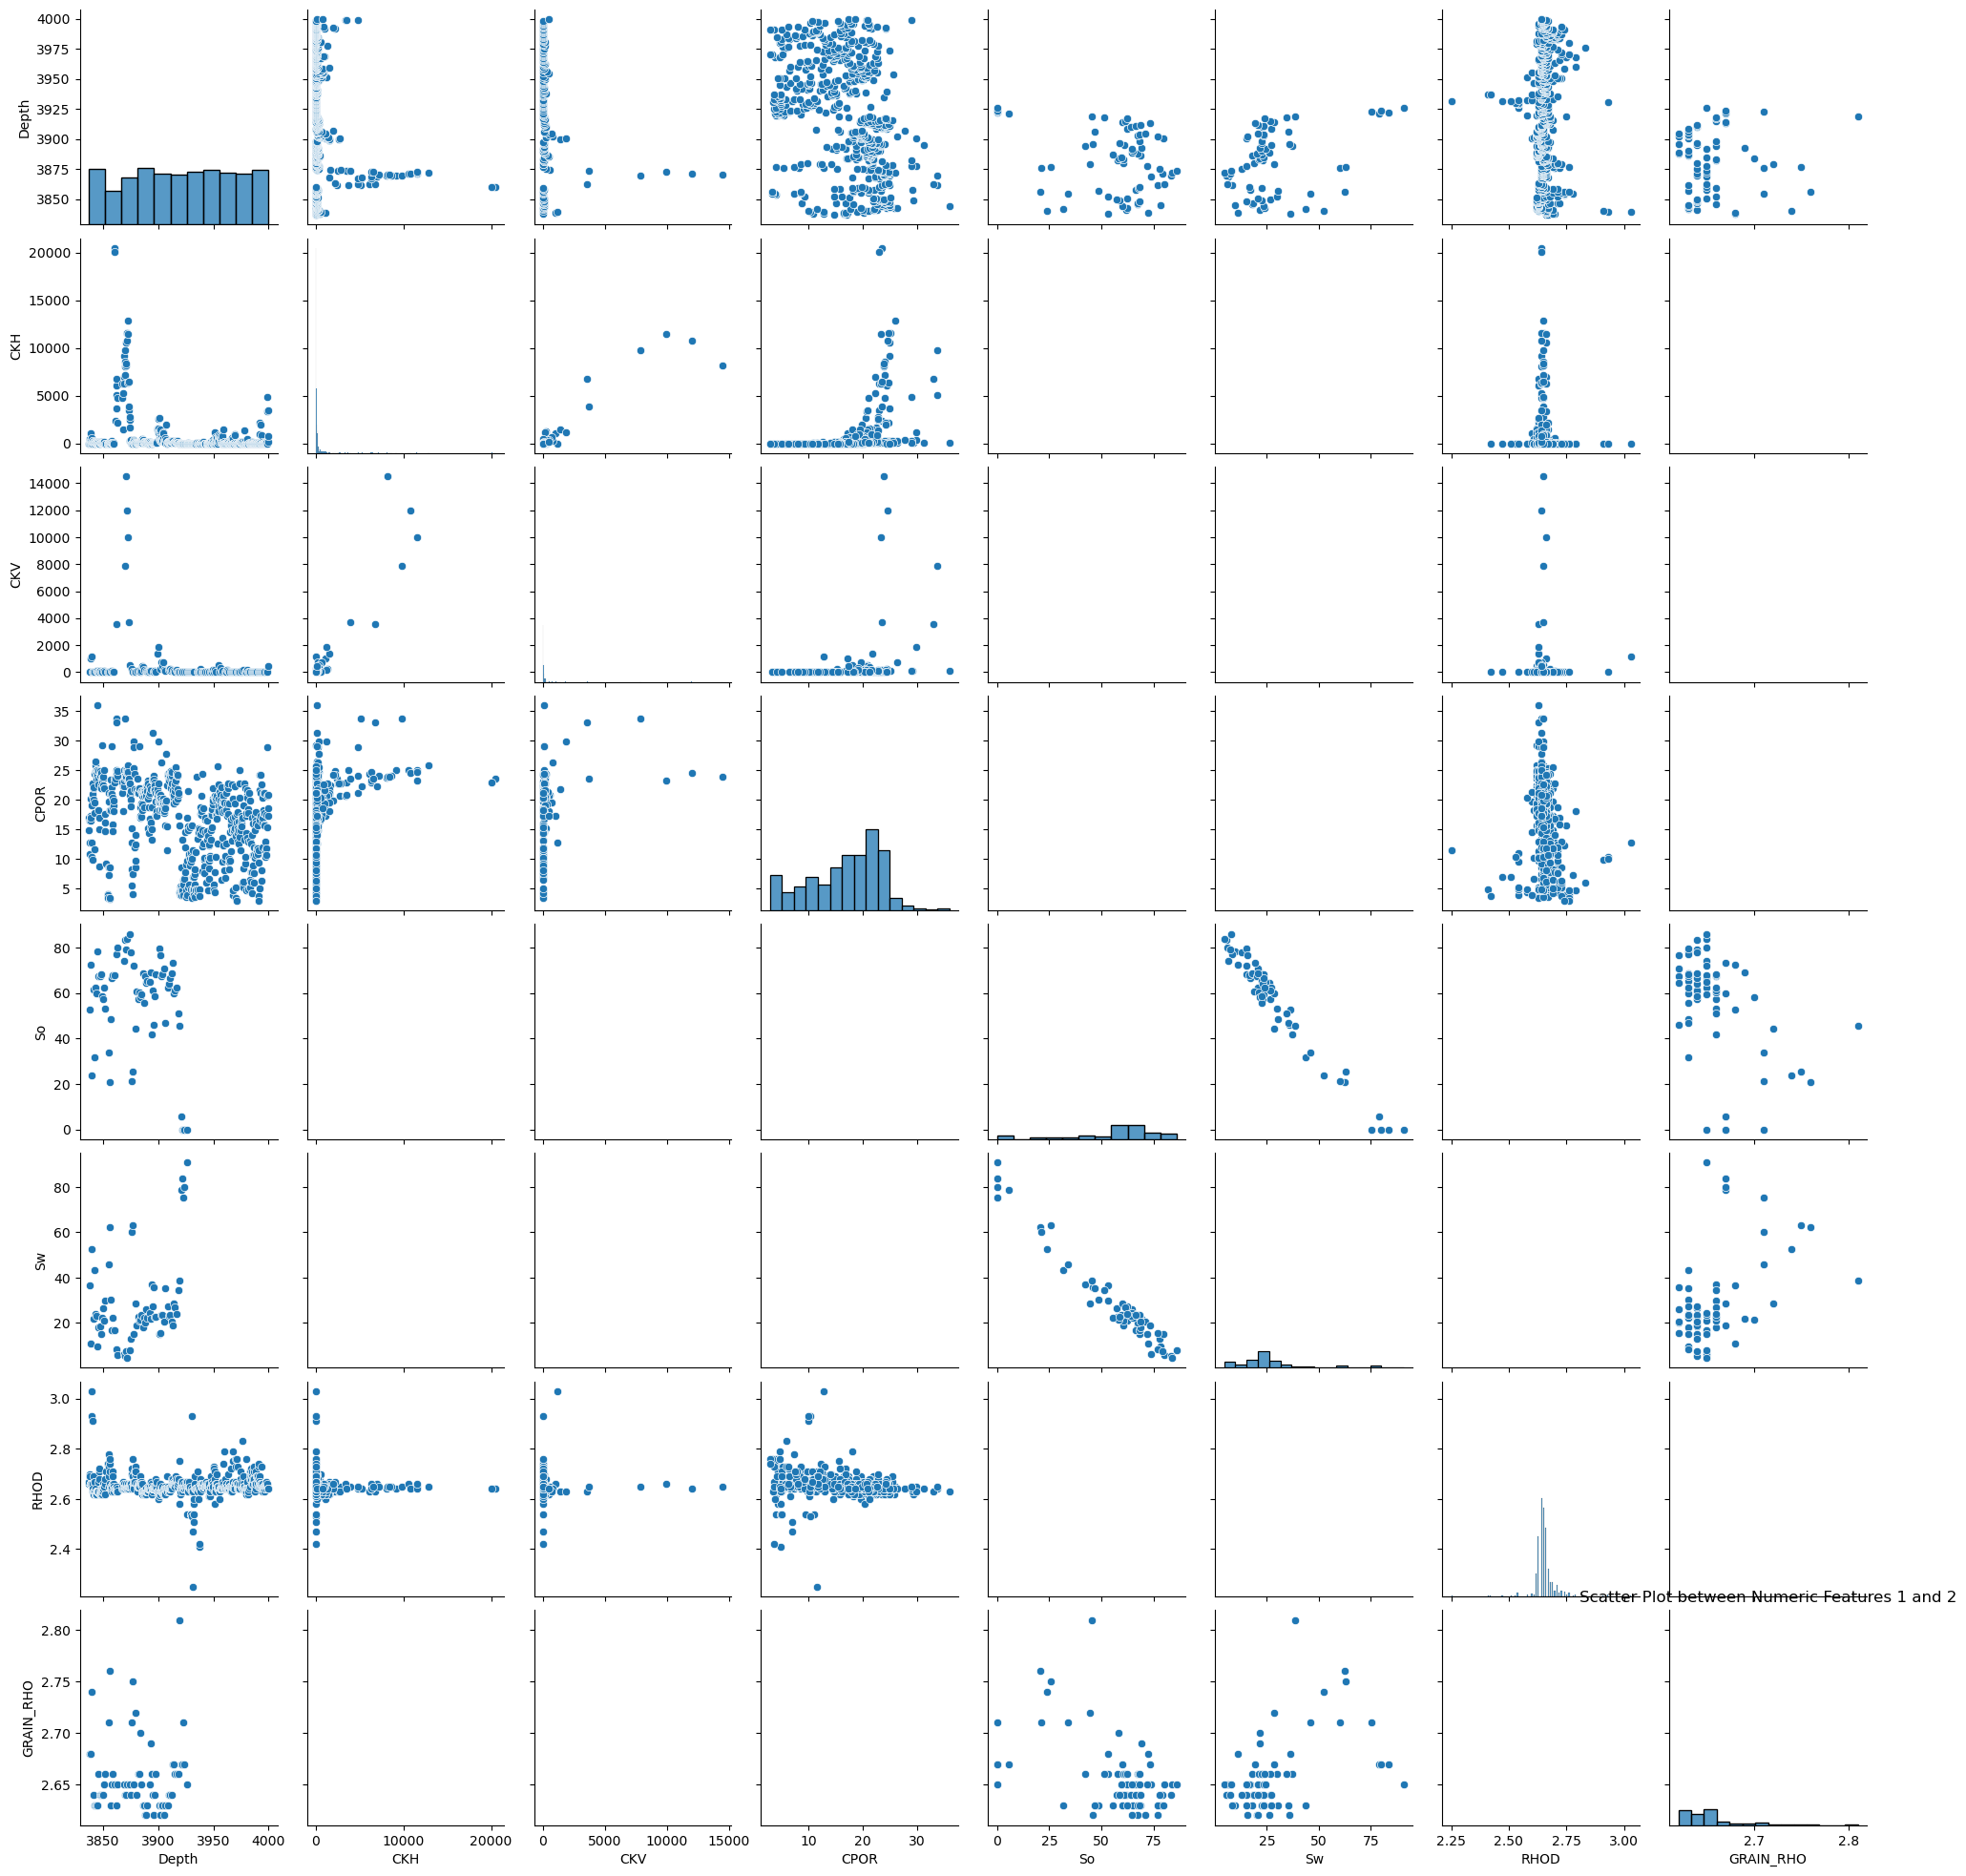

In [9]:
 import seaborn as sns
# Scatterplot between all features
sns.pairplot(core_data)


plt.title('Scatter Plot between Numeric Features 1 and 2')
plt.show()


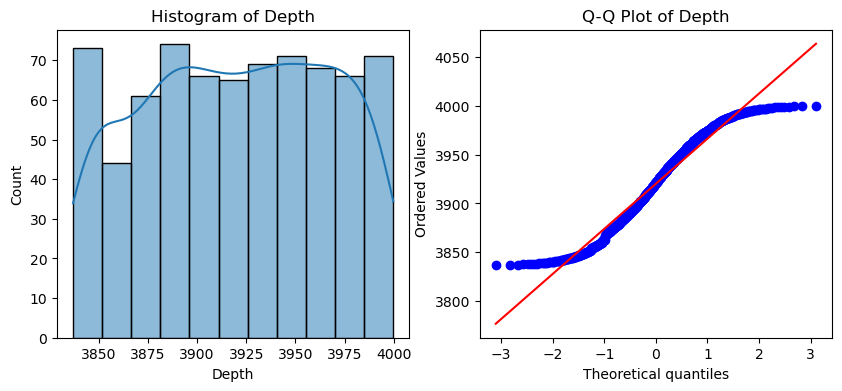

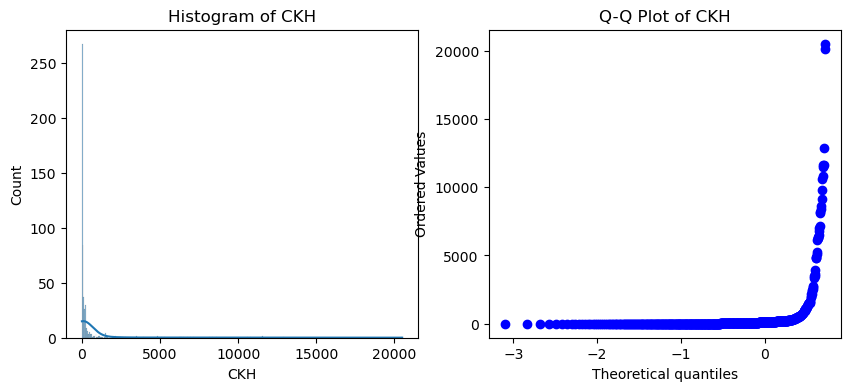

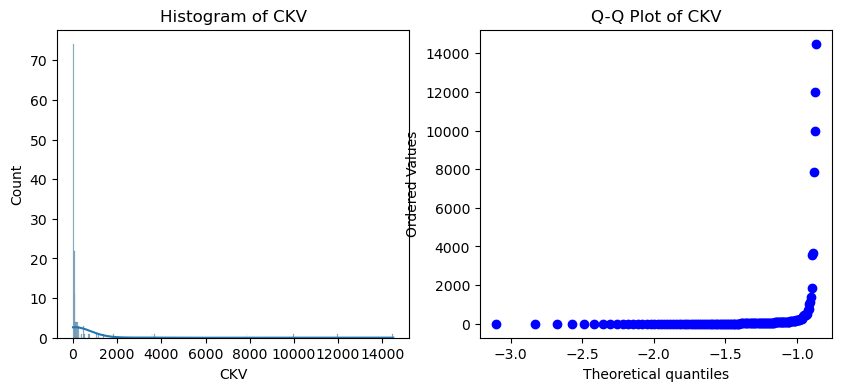

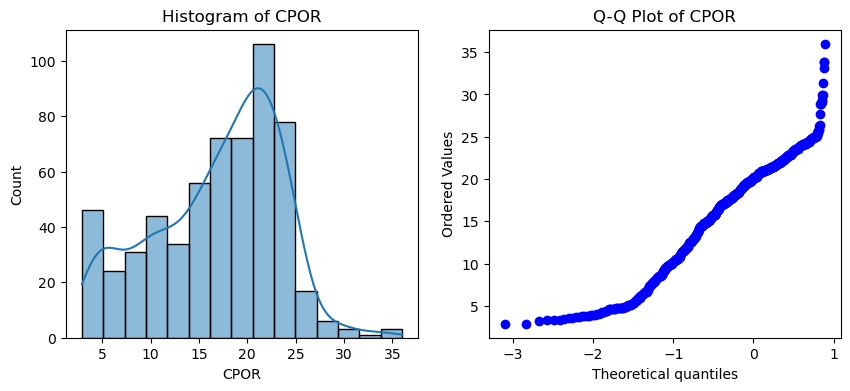

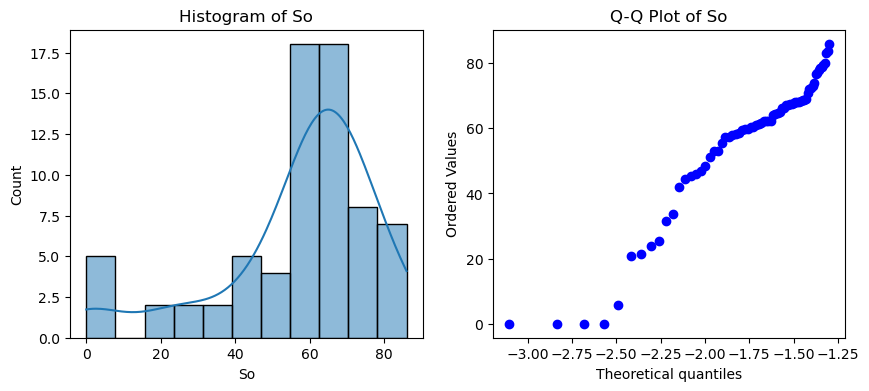

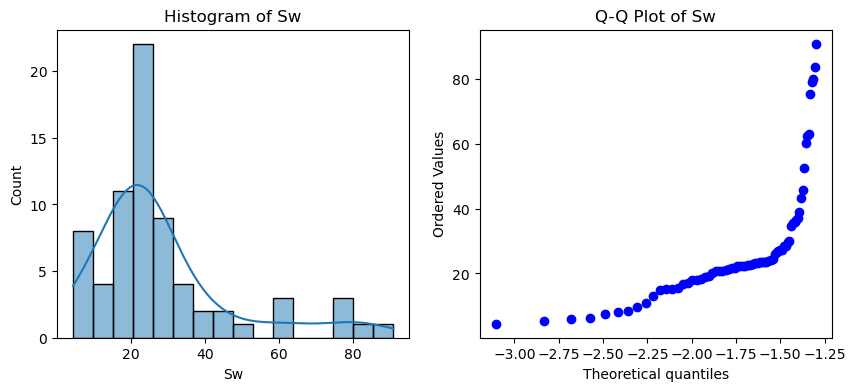

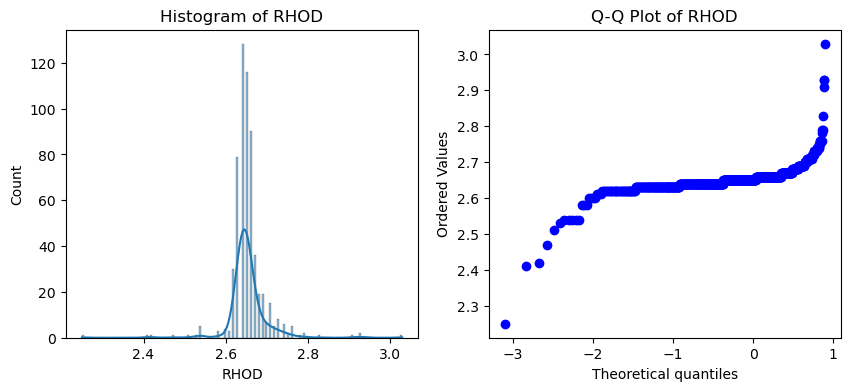

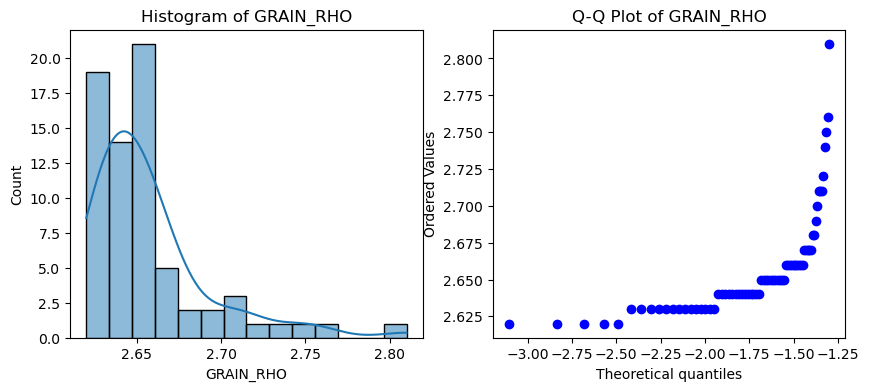

In [10]:
import scipy.stats as stats


for col in core_data.columns:
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Plot histogram
    sns.histplot(core_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    # Plot Q-Q plot
    stats.probplot(core_data[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}')

    plt.show()


In [11]:
# Checking the level of skew in the data

In [12]:
core_data_skewed = core_data.skew(numeric_only=True)
core_data_skewed

Depth       -0.069337
CKH          5.419010
CKV          5.659770
CPOR        -0.389141
So          -1.411998
Sw           1.691781
RHOD         0.510444
GRAIN_RHO    2.066945
dtype: float64

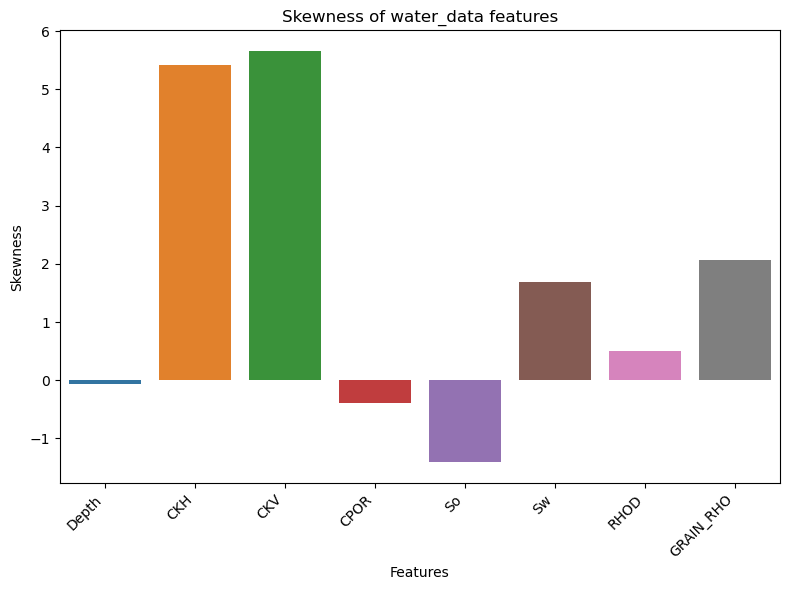

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x=core_data_skewed.index, y=core_data_skewed)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of water_data features')
plt.tight_layout()
plt.show()

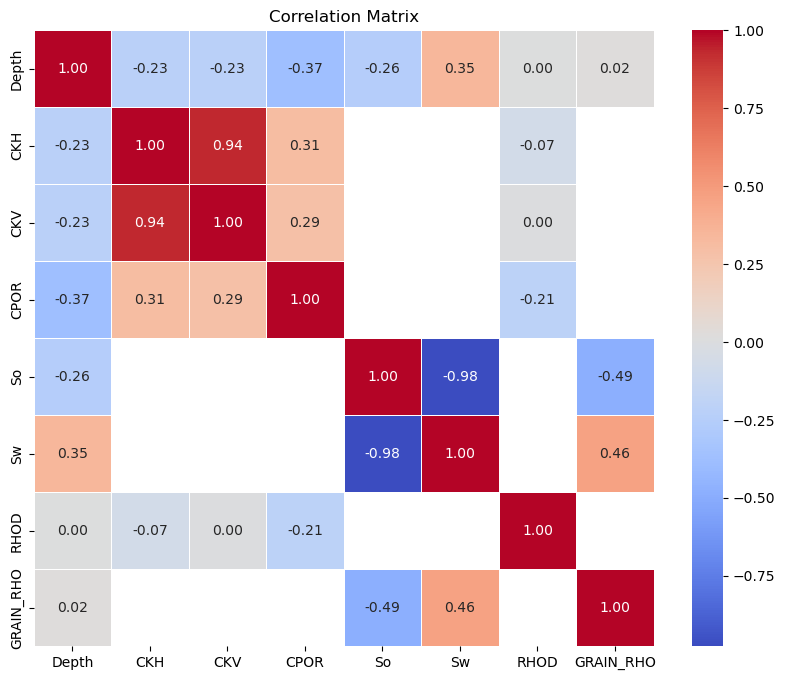

In [14]:
# Using a heatmap to check correlations between features of the core for feature selection and engineering

plt.figure(figsize=(10, 8))
sns.heatmap(core_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Dropping the CKV column to reduce data redundancy and improve computabilty

core_data = core_data.drop('CKV', axis=1)

In [16]:
# Dropping the RHOD and GRAIN_RHO columns since it is fairly costant and doesnt offer much variabilty.

core_data = core_data.drop(['GRAIN_RHO', 'RHOD'], axis=1)

In [17]:
#Using backward fill for Nan Values of Sw and So columns
core_data.columns

Index(['Depth', 'CKH', 'CPOR', 'So', 'Sw'], dtype='object')

In [18]:
# backfill_data = ['So', 'Sw']

# core_data[backfill_data] = core_data[backfill_data].fillna(method='bfill', axis=0, inplace=False)

# core_data

# Handling na Values

In [19]:
core_data.isna().sum()

Depth      0
CKH      171
CPOR     135
So       657
Sw       657
dtype: int64

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
core_data_imputed = pd.DataFrame(imputer.fit_transform(core_data), columns=core_data.columns)

core_data_imputed

Depth        CKH   CPOR     So     Sw
0    3837.00    11.5000  17.00  48.52  32.98
1    3837.25   233.6388  14.80  48.52  32.98
2    3837.55    21.4000  10.80  48.52  32.98
3    3837.80     0.6940  12.80  48.52  32.98
4    3837.88   369.2188  14.74  52.90  36.40
..       ...        ...    ...    ...    ...
723  3998.85  4850.0000  28.90   1.14  81.74
724  3999.00  3350.0000  20.70   1.14  81.74
725  3999.25  3490.0000  20.90   1.14  81.74
726  3999.50   163.0000  17.30   1.14  81.74
727  3999.75   805.0000  18.50   1.14  81.74

[728 rows x 5 columns]

# Exploratory Data Analysis

In [21]:
# core_data

In [22]:
# core_data.dropna()


In [23]:
core_data.describe().T

count         mean          std      min      25%       50%        75%  \
Depth  728.0  3920.153338    46.902816  3837.00  3881.98  3921.125  3960.4875   
CKH    557.0   627.972549  2116.307023     0.01     2.03    52.300   194.0000   
CPOR   593.0    16.829342     6.552523     2.90    12.00    18.100    21.7000   
So      71.0    56.943662    21.084319     0.00    52.00    62.300    68.5000   
Sw      71.0    28.309859    19.203758     4.50    18.20    22.800    29.9500   

            max  
Depth   3999.75  
CKH    20500.00  
CPOR      36.00  
So        86.00  
Sw        90.80

In [24]:
# # core_data.corr()
# core_data[:5]

In [25]:
# core_data.info()

In [26]:
# core_data = core_data.apply(pd.to_numeric, errors='coerce')


# # core_data['Sw'].fillna(method='bfill', inplace=True)
# # core_data['So'].fillna(method='bfill', inplace=True)

# core_data = core_data.dropna()


# core_data.info()

# core_data.corr()

# Outlier Detection And Removal

In [27]:
core_data = core_data_imputed
    
for feature in core_data.columns.values:
    Q1 = core_data[feature].quantile(0.25)
    
    Q3 = core_data[feature].quantile(0.75)
    
    IQR = Q3- Q1
    
    step = 1.5 * IQR
    
    outliers = core_data[(core_data[feature] < Q1 - step) | (core_data[feature] > Q3 + step)]
display(f'Number of Outliers: {len(outliers)}')    
display(f'Outliers: {outliers}')
good_data = core_data.drop(outliers.index)


'Number of Outliers: 0'

'Outliers: Empty DataFrame\nColumns: [Depth, CKH, CPOR, So, Sw]\nIndex: []'

# Experimenting a regression fit between features to estimate CKH, core permeability


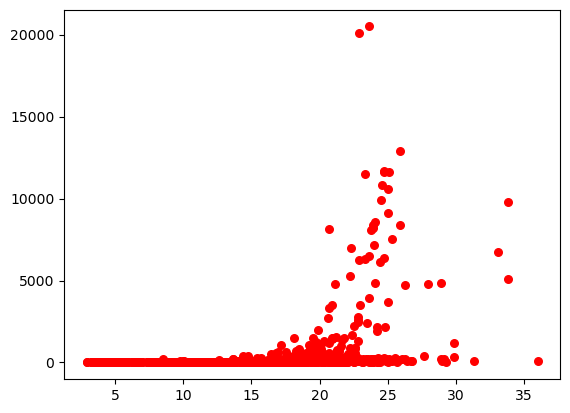

In [28]:
plt.scatter(core_data['CPOR'], core_data['CKH'], c='red', s=30)
plt.show()

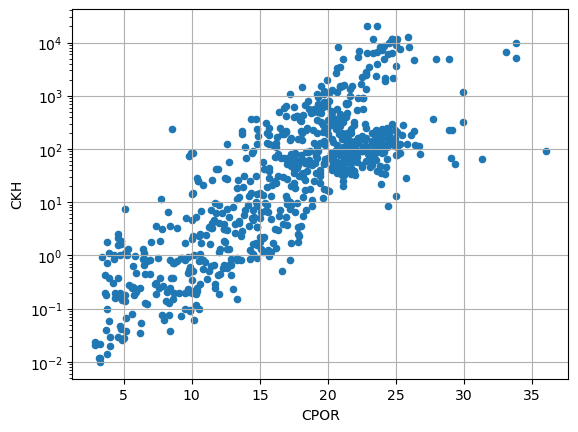

In [29]:
core_data.plot(kind="scatter", x="CPOR", y="CKH")
plt.yscale('log')
plt.grid(True)

In [30]:
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter


poro_perm = core_data[['CPOR', 'CKH']].copy()
poro_perm.dropna(inplace=True)

# Polyfit for comparison
poro_perm_polyfit = np.polyfit(core_data['CPOR'], np.log10(core_data['CKH']), 1)

# Display regression equation for polyfit
polyfit_equation = f'y = {poro_perm_polyfit[1]:.4f} + {poro_perm_polyfit[0]:.4f} * x'
print("Polyfit Equation:", polyfit_equation)


Polyfit Equation: y = -1.4833 + 0.1710 * x


In [31]:
#Getting Least Square Equation
x = core_data['CPOR']
x = sm.add_constant(x)
y = np.log(core_data['CKH'])

model = sm.OLS(y, x, missing='drop')
results = model.fit()

# Display OLS regression equation
ols_equation = f'y = {results.params[0]:.4f} + {results.params[1]:.4f} * x'
print("OLS Regression Equation:", ols_equation)


OLS Regression Equation: y = -3.4154 + 0.3938 * x


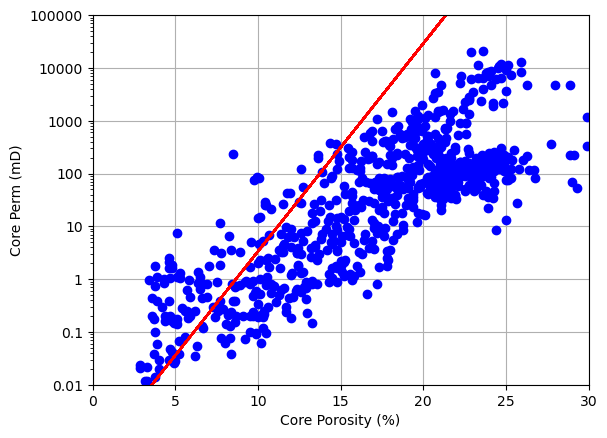

In [32]:
# Plotting regression plot
fig, ax = plt.subplots()

ax.axis([0, 30, 0.01, 100000])
ax.semilogy(core_data['CPOR'], core_data['CKH'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['CPOR'], 10**(results.params[1] * core_data['CPOR'] + results.params[0]), 'r-')

# Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CKH   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1525.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.36e-180
Time:                        05:48:11   Log-Likelihood:                -1432.0
No. Observations:                 728   AIC:                             2868.
Df Residuals:                     726   BIC:                             2877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4154      0.181    -18.850      0.000      -3.771      -3.060
CPOR           0.3938      0.010     39.057      0.000       0.374       0.414
==============================================================================
Omnibus:                       11.286   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.632
Skew:                           0.212   Prob(JB):                      0.00810
Kurtosis:                       2.628   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
core_data = core_data.set_index("Depth", drop= True)


core_data

CKH   CPOR     So     Sw
Depth                                  
3837.00    11.5000  17.00  48.52  32.98
3837.25   233.6388  14.80  48.52  32.98
3837.55    21.4000  10.80  48.52  32.98
3837.80     0.6940  12.80  48.52  32.98
3837.88   369.2188  14.74  52.90  36.40
...            ...    ...    ...    ...
3998.85  4850.0000  28.90   1.14  81.74
3999.00  3350.0000  20.70   1.14  81.74
3999.25  3490.0000  20.90   1.14  81.74
3999.50   163.0000  17.30   1.14  81.74
3999.75   805.0000  18.50   1.14  81.74

[728 rows x 4 columns]

# Feature Scaling

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()

X = core_data.drop('CKH', axis=1)
y = core_data['CKH']

X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns.values

X = X_scaled
# X = pd.DataFrame(X_scaled)
# X.columns = ['CPOR', "RHOD"]
X

CPOR        So        Sw
0    0.030743  0.580653 -0.704739
1   -0.314733  0.580653 -0.704739
2   -0.942871  0.580653 -0.704739
3   -0.628802  0.580653 -0.704739
4   -0.324155  0.723297 -0.587291
..        ...       ...       ...
723  1.899453 -0.962384  0.969753
724  0.611770 -0.962384  0.969753
725  0.643177 -0.962384  0.969753
726  0.077853 -0.962384  0.969753
727  0.266294 -0.962384  0.969753

[728 rows x 3 columns]

Fitting a multiple regression plot between all other features to estimate CKH, Core permeability

Fitting and Visualizing a Multiple regression model on the data

Coefficients: [ 330.63655368 2470.39755732 1950.20233683]
Intercept: 602.7268508869774


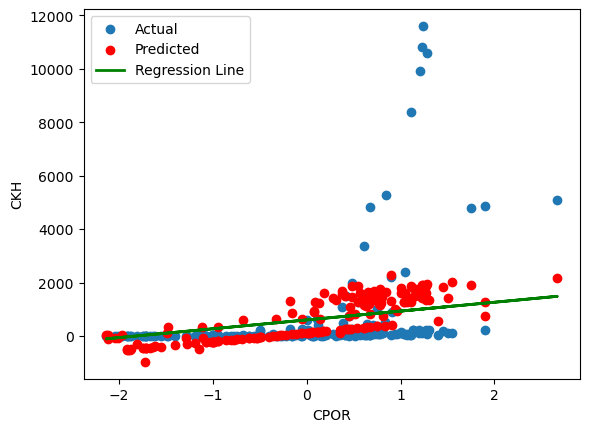

In [36]:
np.random.seed(42)
tf.random.set_seed(42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.scatter(X_test['CPOR'], y_pred, label='Predicted', color='red')
plt.plot(X_test['CPOR'], intercept + coefficients[0] * X_test['CPOR'], color='green', linewidth=2, label='Regression Line')
plt.xlabel('CPOR')
plt.ylabel('CKH')

# plt.yscale('log')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

2993770.7106694467


1730.251632182281

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.13667002712552145

Coefficients: [-8.62119125e-08  1.53355984e+03 -1.19592825e+04 -8.53107439e+03
  6.18729741e+02  4.14913435e+03  7.11514702e+03 -2.41153305e+04
 -5.40400284e+04 -2.91002078e+04  5.37617578e+01  8.59043461e+03
  8.79734014e+03 -4.94801811e+04 -7.17016128e+04 -2.37099595e+04
  2.42293272e+05  6.38659933e+05  5.73459966e+05  1.73290943e+05
  1.25574076e+01  9.04344654e+02  9.63591732e+02  1.84920589e+03
  1.52124139e+04  1.26274697e+04 -1.38787705e+05 -4.57046470e+05
 -4.69323128e+05 -1.54564691e+05  3.08874178e+05  1.44887381e+06
  2.40834265e+06  1.72200761e+06  4.51971633e+05]
Intercept: 819.9870737015179


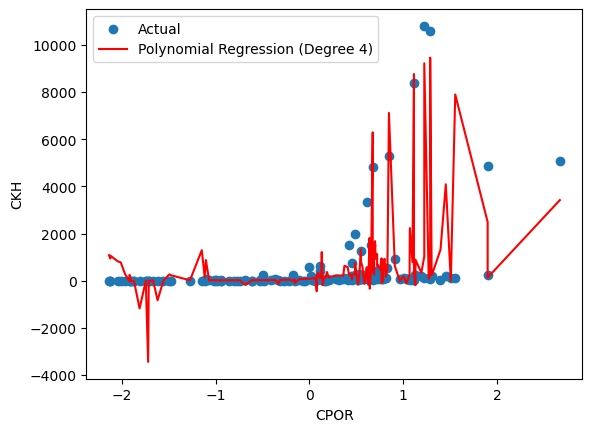

In [39]:
#Splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Polynomial Regression with degree n
degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
X_test_sorted = X_test.sort_values(by='CPOR')  # Sort for better visualization
y_pred_poly = model.predict(poly.transform(X_test_sorted))
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.plot(X_test_sorted['CPOR'], y_pred_poly, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('CPOR')
plt.ylabel('CKH')
# plt.yscale('log')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.603615583463827

In [41]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

mae

510.4783383136639

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

1057047.0396867353


1028.1279296307125

In [43]:
X

CPOR        So        Sw
0    0.030743  0.580653 -0.704739
1   -0.314733  0.580653 -0.704739
2   -0.942871  0.580653 -0.704739
3   -0.628802  0.580653 -0.704739
4   -0.324155  0.723297 -0.587291
..        ...       ...       ...
723  1.899453 -0.962384  0.969753
724  0.611770 -0.962384  0.969753
725  0.643177 -0.962384  0.969753
726  0.077853 -0.962384  0.969753
727  0.266294 -0.962384  0.969753

[728 rows x 3 columns]

# Using TensorFlow

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

from tensorflow.keras.layers import Dense




Model 1

In [45]:
# from keras.optimizers import Adam


# model = keras.Sequential([
#     Dense(200, activation='relu', input_shape=(3,)),
#     Dense(150, activation='relu'),
#     Dense(75, activation='relu'),
#     Dense(25, activation='relu'),
#     Dense(1, activation='linear')
# ], name="my_model")

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# # Train the model
# epochs = 50  # You can adjust the number of epochs
# batch_size = 32  # You can adjust the batch size
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# # Evaluate the model
# loss, mae = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}, Test MAE: {mae}')

# # You can also make predictions using the trained model
# predictions = model.predict(X_test)


Model 2

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)

print(f'Test MAE (Random Forest): {mae_rf}')
print(f'Test MSE (Random Forest): {mse_rf}')


Test MAE (Random Forest): 286.40480161353395
Test MSE (Random Forest): 881460.2673184642


In [47]:
r_squared = r2_score(y_test, rf_predictions)
print(f'R-squared (Random Forest): {r_squared}')

mean_true_values = y_test.mean()


mae_percentage = (mae_rf / mean_true_values) * 100


print(f'Test MAE (Random Forest): {mae_rf}')
print(f'Test MAE Percentage (Random Forest): {mae_percentage:.2f}%')

R-squared (Random Forest): 0.669459257116509
Test MAE (Random Forest): 286.40480161353395
Test MAE Percentage (Random Forest): 57.83%


# Model 3

In [ ]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)


model = keras.Sequential([
    tf.keras.Input(shape=(3, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer = regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=100, verbose=2)

model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)



print('Done')


Epoch 1/100


59/59 - 4s - loss: 4745536.0000 - mae: 602.7201 - 4s/epoch - 72ms/step
Epoch 2/100
59/59 - 0s - loss: 4440428.0000 - mae: 599.1135 - 312ms/epoch - 5ms/step
Epoch 3/100
59/59 - 0s - loss: 3808893.7500 - mae: 752.1868 - 265ms/epoch - 4ms/step
Epoch 4/100
59/59 - 0s - loss: 3631452.2500 - mae: 837.9175 - 264ms/epoch - 4ms/step
Epoch 5/100
59/59 - 0s - loss: 3596817.0000 - mae: 848.9392 - 256ms/epoch - 4ms/step
Epoch 6/100
59/59 - 0s - loss: 3573841.5000 - mae: 878.5556 - 261ms/epoch - 4ms/step
Epoch 7/100
59/59 - 0s - loss: 3541970.5000 - mae: 789.7328 - 259ms/epoch - 4ms/step
Epoch 8/100
59/59 - 0s - loss: 3511611.7500 - mae: 887.6096 - 266ms/epoch - 5ms/step
Epoch 9/100
59/59 - 0s - loss: 3485102.7500 - mae: 805.1464 - 265ms/epoch - 4ms/step
Epoch 10/100
59/59 - 0s - loss: 3461657.7500 - mae: 797.8054 - 257ms/epoch - 4ms/step
Epoch 11/100
59/59 - 0s - loss: 3463278.7500 - mae: 828.5788 - 255ms/epoch - 4ms/step
Epoch 12/100
59/59 - 0s - loss: 3415100.2500 - mae: 800.3428 -

Model 4

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error


target_range = y_train.max() - y_train.min()


y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range


norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=20, epochs=500, verbose=2)

# Evaluate the model
predictions_normalized = model.predict(Xn_test)
predictions = predictions_normalized * target_range + y_train.min()

mae_percentage = mean_absolute_error(y_test, predictions) / target_range * 100

print(f'Mean Absolute Error Percentage: {mae_percentage}%')
print(f'Target range: : {target_range}')

Epoch 1/500
30/30 - 2s - loss: 3.5061 - mae: 0.0447 - 2s/epoch - 53ms/step
Epoch 2/500
30/30 - 0s - loss: 3.1782 - mae: 0.0354 - 152ms/epoch - 5ms/step
Epoch 3/500
30/30 - 0s - loss: 2.8789 - mae: 0.0390 - 137ms/epoch - 5ms/step
Epoch 4/500
30/30 - 0s - loss: 2.6060 - mae: 0.0364 - 187ms/epoch - 6ms/step
Epoch 5/500
30/30 - 0s - loss: 2.3571 - mae: 0.0371 - 142ms/epoch - 5ms/step
Epoch 6/500
30/30 - 0s - loss: 2.1303 - mae: 0.0386 - 137ms/epoch - 5ms/step
Epoch 7/500
30/30 - 0s - loss: 1.9238 - mae: 0.0331 - 141ms/epoch - 5ms/step
Epoch 8/500
30/30 - 0s - loss: 1.7358 - mae: 0.0395 - 141ms/epoch - 5ms/step
Epoch 9/500
30/30 - 0s - loss: 1.5649 - mae: 0.0342 - 149ms/epoch - 5ms/step
Epoch 10/500
30/30 - 0s - loss: 1.4094 - mae: 0.0340 - 140ms/epoch - 5ms/step
Epoch 11/500
30/30 - 0s - loss: 1.2683 - mae: 0.0363 - 149ms/epoch - 5ms/step
Epoch 12/500
30/30 - 0s - loss: 1.1399 - mae: 0.0339 - 140ms/epoch - 5ms/step
Epoch 13/500
30/30 - 0s - loss: 1.0237 - mae: 0.0361 - 146ms/epoch - 5ms/st

30/30 - 0s - loss: 0.0107 - mae: 0.0433 - 136ms/epoch - 5ms/step
Epoch 107/500
30/30 - 0s - loss: 0.0106 - mae: 0.0416 - 130ms/epoch - 4ms/step
Epoch 108/500
30/30 - 0s - loss: 0.0107 - mae: 0.0415 - 134ms/epoch - 4ms/step
Epoch 109/500
30/30 - 0s - loss: 0.0106 - mae: 0.0434 - 133ms/epoch - 4ms/step
Epoch 110/500
30/30 - 0s - loss: 0.0107 - mae: 0.0435 - 130ms/epoch - 4ms/step
Epoch 111/500
30/30 - 0s - loss: 0.0106 - mae: 0.0415 - 132ms/epoch - 4ms/step
Epoch 112/500
30/30 - 0s - loss: 0.0106 - mae: 0.0409 - 135ms/epoch - 4ms/step
Epoch 113/500
30/30 - 0s - loss: 0.0106 - mae: 0.0423 - 134ms/epoch - 4ms/step
Epoch 114/500
30/30 - 0s - loss: 0.0106 - mae: 0.0428 - 133ms/epoch - 4ms/step
Epoch 115/500
30/30 - 0s - loss: 0.0106 - mae: 0.0438 - 134ms/epoch - 4ms/step
Epoch 116/500
30/30 - 0s - loss: 0.0106 - mae: 0.0423 - 134ms/epoch - 4ms/step
Epoch 117/500
30/30 - 0s - loss: 0.0106 - mae: 0.0424 - 133ms/epoch - 4ms/step
Epoch 118/500
30/30 - 0s - loss: 0.0107 - mae: 0.0439 - 133ms/epoc

Epoch 210/500
30/30 - 0s - loss: 0.0105 - mae: 0.0410 - 134ms/epoch - 4ms/step
Epoch 211/500
30/30 - 0s - loss: 0.0106 - mae: 0.0437 - 135ms/epoch - 4ms/step
Epoch 212/500
30/30 - 0s - loss: 0.0105 - mae: 0.0429 - 134ms/epoch - 4ms/step
Epoch 213/500
30/30 - 0s - loss: 0.0105 - mae: 0.0421 - 136ms/epoch - 5ms/step
Epoch 214/500
30/30 - 0s - loss: 0.0105 - mae: 0.0409 - 135ms/epoch - 4ms/step
Epoch 215/500
30/30 - 0s - loss: 0.0105 - mae: 0.0414 - 135ms/epoch - 4ms/step
Epoch 216/500
30/30 - 0s - loss: 0.0105 - mae: 0.0399 - 135ms/epoch - 4ms/step
Epoch 217/500
30/30 - 0s - loss: 0.0105 - mae: 0.0421 - 136ms/epoch - 5ms/step
Epoch 218/500
30/30 - 0s - loss: 0.0105 - mae: 0.0410 - 137ms/epoch - 5ms/step
Epoch 219/500
30/30 - 0s - loss: 0.0105 - mae: 0.0420 - 137ms/epoch - 5ms/step
Epoch 220/500
30/30 - 0s - loss: 0.0105 - mae: 0.0405 - 137ms/epoch - 5ms/step
Epoch 221/500
30/30 - 0s - loss: 0.0105 - mae: 0.0406 - 133ms/epoch - 4ms/step
Epoch 222/500
30/30 - 0s - loss: 0.0105 - mae: 0.040

Epoch 314/500
30/30 - 0s - loss: 0.0104 - mae: 0.0390 - 138ms/epoch - 5ms/step
Epoch 315/500
30/30 - 0s - loss: 0.0104 - mae: 0.0410 - 128ms/epoch - 4ms/step
Epoch 316/500
30/30 - 0s - loss: 0.0104 - mae: 0.0406 - 132ms/epoch - 4ms/step
Epoch 317/500
30/30 - 0s - loss: 0.0104 - mae: 0.0412 - 132ms/epoch - 4ms/step
Epoch 318/500
30/30 - 0s - loss: 0.0104 - mae: 0.0383 - 133ms/epoch - 4ms/step
Epoch 319/500
30/30 - 0s - loss: 0.0104 - mae: 0.0421 - 133ms/epoch - 4ms/step
Epoch 320/500
30/30 - 0s - loss: 0.0104 - mae: 0.0400 - 131ms/epoch - 4ms/step
Epoch 321/500
30/30 - 0s - loss: 0.0104 - mae: 0.0412 - 134ms/epoch - 4ms/step
Epoch 322/500
30/30 - 0s - loss: 0.0105 - mae: 0.0423 - 163ms/epoch - 5ms/step
Epoch 323/500
30/30 - 0s - loss: 0.0104 - mae: 0.0390 - 138ms/epoch - 5ms/step
Epoch 324/500
30/30 - 0s - loss: 0.0104 - mae: 0.0404 - 137ms/epoch - 5ms/step
Epoch 325/500
30/30 - 0s - loss: 0.0104 - mae: 0.0420 - 138ms/epoch - 5ms/step
Epoch 326/500
30/30 - 0s - loss: 0.0104 - mae: 0.039

Epoch 418/500
30/30 - 0s - loss: 0.0103 - mae: 0.0393 - 135ms/epoch - 4ms/step
Epoch 419/500
30/30 - 0s - loss: 0.0103 - mae: 0.0420 - 139ms/epoch - 5ms/step
Epoch 420/500
30/30 - 0s - loss: 0.0103 - mae: 0.0388 - 137ms/epoch - 5ms/step
Epoch 421/500
30/30 - 0s - loss: 0.0103 - mae: 0.0414 - 138ms/epoch - 5ms/step
Epoch 422/500
30/30 - 0s - loss: 0.0103 - mae: 0.0402 - 136ms/epoch - 5ms/step
Epoch 423/500
30/30 - 0s - loss: 0.0103 - mae: 0.0418 - 135ms/epoch - 4ms/step
Epoch 424/500
30/30 - 0s - loss: 0.0103 - mae: 0.0405 - 138ms/epoch - 5ms/step
Epoch 425/500
30/30 - 0s - loss: 0.0104 - mae: 0.0437 - 131ms/epoch - 4ms/step
Epoch 426/500
30/30 - 0s - loss: 0.0103 - mae: 0.0390 - 137ms/epoch - 5ms/step
Epoch 427/500
30/30 - 0s - loss: 0.0103 - mae: 0.0394 - 135ms/epoch - 4ms/step
Epoch 428/500
30/30 - 0s - loss: 0.0103 - mae: 0.0407 - 136ms/epoch - 5ms/step
Epoch 429/500
30/30 - 0s - loss: 0.0103 - mae: 0.0404 - 135ms/epoch - 4ms/step
Epoch 430/500
30/30 - 0s - loss: 0.0104 - mae: 0.044

# Model 5

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range


norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    tf.keras.Input(shape=(3, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3',),
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=300, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')

print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')

# Evaluate on training data
train_loss, train_mae = model.evaluate(Xn, y_train, batch_size=10, verbose=2)
train_mae_percentage = (train_mae / (max(y_train) - min(y_train))) * 100

# Evaluate on testing data
test_loss, test_mae = model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)
test_mae_percentage = (test_mae / (max(y_test) - min(y_test))) * 100

print(f"Training MAE: {train_mae_percentage:.2f}% of target range")
print(f"Testing MAE: {test_mae_percentage:.2f}% of target range")



print('Done')


Epoch 1/300
59/59 - 1s - loss: 39094890118906031393042595840.0000 - mae: 36737612.0000 - 1s/epoch - 18ms/step
Epoch 2/300
59/59 - 0s - loss: 41033841850740996151688822784.0000 - mae: 607.9128 - 201ms/epoch - 3ms/step
Epoch 3/300
59/59 - 0s - loss: 40076679555427596372260421632.0000 - mae: 607.9125 - 194ms/epoch - 3ms/step
Epoch 4/300
59/59 - 0s - loss: 39141861137127894319160623104.0000 - mae: 607.9127 - 195ms/epoch - 3ms/step
Epoch 5/300
59/59 - 0s - loss: 38228831717780152809076817920.0000 - mae: 607.9127 - 196ms/epoch - 3ms/step
Epoch 6/300
59/59 - 0s - loss: 37337109616003119138197209088.0000 - mae: 607.9129 - 193ms/epoch - 3ms/step
Epoch 7/300
59/59 - 0s - loss: 36466184816216643384838717440.0000 - mae: 607.9127 - 197ms/epoch - 3ms/step
Epoch 8/300
59/59 - 0s - loss: 35615561469940024236253904896.0000 - mae: 607.9126 - 193ms/epoch - 3ms/step
Epoch 9/300
59/59 - 0s - loss: 34784802758273596250260504576.0000 - mae: 607.9127 - 195ms/epoch - 3ms/step
Epoch 10/300
59/59 - 0s - loss: 33

59/59 - 0s - loss: 6988179171999673900630802432.0000 - mae: 607.9128 - 191ms/epoch - 3ms/step
Epoch 78/300
59/59 - 0s - loss: 6825174886927220921967050752.0000 - mae: 607.9128 - 184ms/epoch - 3ms/step
Epoch 79/300
59/59 - 0s - loss: 6665969745690236572877717504.0000 - mae: 607.9126 - 189ms/epoch - 3ms/step
Epoch 80/300
59/59 - 0s - loss: 6510479926283649917160259584.0000 - mae: 607.9126 - 187ms/epoch - 3ms/step
Epoch 81/300
59/59 - 0s - loss: 6358615703744286431555616768.0000 - mae: 607.9126 - 184ms/epoch - 3ms/step
Epoch 82/300
59/59 - 0s - loss: 6210293846362885538566897664.0000 - mae: 607.9128 - 189ms/epoch - 3ms/step
Epoch 83/300
59/59 - 0s - loss: 6065432893317617736814166016.0000 - mae: 607.9128 - 184ms/epoch - 3ms/step
Epoch 84/300
59/59 - 0s - loss: 5923951974082463883623137280.0000 - mae: 607.9127 - 187ms/epoch - 3ms/step
Epoch 85/300
59/59 - 0s - loss: 5785769037539784118908223488.0000 - mae: 607.9127 - 183ms/epoch - 3ms/step
Epoch 86/300
59/59 - 0s - loss: 565081088700909396

Epoch 154/300
59/59 - 0s - loss: 1135233659584329835337482240.0000 - mae: 607.9127 - 183ms/epoch - 3ms/step
Epoch 155/300
59/59 - 0s - loss: 1108753358466519773992714240.0000 - mae: 607.9127 - 185ms/epoch - 3ms/step
Epoch 156/300
59/59 - 0s - loss: 1082890432979368623921430528.0000 - mae: 607.9127 - 190ms/epoch - 3ms/step
Epoch 157/300
59/59 - 0s - loss: 1057631011171332955540815872.0000 - mae: 607.9128 - 186ms/epoch - 3ms/step
Epoch 158/300
59/59 - 0s - loss: 1032960557008082685724196864.0000 - mae: 607.9127 - 188ms/epoch - 3ms/step
Epoch 159/300
59/59 - 0s - loss: 1008865641259932153917997056.0000 - mae: 607.9127 - 191ms/epoch - 3ms/step
Epoch 160/300
59/59 - 0s - loss: 985333056058124584083259392.0000 - mae: 607.9127 - 185ms/epoch - 3ms/step
Epoch 161/300
59/59 - 0s - loss: 962349224599021725989994496.0000 - mae: 607.9127 - 186ms/epoch - 3ms/step
Epoch 162/300
59/59 - 0s - loss: 939901307948748277790277632.0000 - mae: 607.9127 - 187ms/epoch - 3ms/step
Epoch 163/300
59/59 - 0s - loss

Epoch 231/300
59/59 - 0s - loss: 184419368522039429068488704.0000 - mae: 607.9128 - 188ms/epoch - 3ms/step
Epoch 232/300
59/59 - 0s - loss: 180117569357306287922085888.0000 - mae: 607.9128 - 185ms/epoch - 3ms/step
Epoch 233/300
59/59 - 0s - loss: 175916157373822274155577344.0000 - mae: 607.9127 - 187ms/epoch - 3ms/step
Epoch 234/300
59/59 - 0s - loss: 171812771388345952946356224.0000 - mae: 607.9127 - 190ms/epoch - 3ms/step
Epoch 235/300
59/59 - 0s - loss: 167805050217635889471815680.0000 - mae: 607.9127 - 187ms/epoch - 3ms/step
Epoch 236/300
59/59 - 0s - loss: 163890817145891386004865024.0000 - mae: 607.9128 - 189ms/epoch - 3ms/step
Epoch 237/300
59/59 - 0s - loss: 160067895457311744818413568.0000 - mae: 607.9127 - 182ms/epoch - 3ms/step
Epoch 238/300
59/59 - 0s - loss: 156334163776328489314025472.0000 - mae: 607.9128 - 186ms/epoch - 3ms/step
Epoch 239/300
59/59 - 0s - loss: 152687482280629069183713280.0000 - mae: 607.9128 - 190ms/epoch - 3ms/step
Epoch 240/300
59/59 - 0s - loss: 1491

# Model 6a

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(300, activation='relu', name='L1'),
    layers.Dense(150, activation='relu', name='L2'),
    layers.Dense(150, activation='relu', name='L3'),
    layers.Dense(100, activation='relu', name='L6'),
    layers.Dense(10, activation='relu', name='L4'), 
    layers.Dense(1, activation='linear', name='L5')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=15, epochs=250, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')

print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')



# Calculate R2 score for training data
train_r2_custom = r2_score(y_train, train_predictions)

# Calculate R2 score for testing data
test_r2_custom = r2_score(y_test, test_predictions)



Epoch 1/250
39/39 - 2s - loss: 0.0082 - mae: 0.0441 - 2s/epoch - 51ms/step
Epoch 2/250
39/39 - 0s - loss: 0.0074 - mae: 0.0366 - 161ms/epoch - 4ms/step
Epoch 3/250
39/39 - 0s - loss: 0.0074 - mae: 0.0377 - 149ms/epoch - 4ms/step
Epoch 4/250
39/39 - 0s - loss: 0.0071 - mae: 0.0345 - 148ms/epoch - 4ms/step
Epoch 5/250
39/39 - 0s - loss: 0.0069 - mae: 0.0372 - 149ms/epoch - 4ms/step
Epoch 6/250
39/39 - 0s - loss: 0.0065 - mae: 0.0357 - 148ms/epoch - 4ms/step
Epoch 7/250
39/39 - 0s - loss: 0.0062 - mae: 0.0328 - 175ms/epoch - 4ms/step
Epoch 8/250
39/39 - 0s - loss: 0.0060 - mae: 0.0334 - 149ms/epoch - 4ms/step
Epoch 9/250
39/39 - 0s - loss: 0.0057 - mae: 0.0324 - 148ms/epoch - 4ms/step
Epoch 10/250
39/39 - 0s - loss: 0.0055 - mae: 0.0314 - 147ms/epoch - 4ms/step
Epoch 11/250
39/39 - 0s - loss: 0.0055 - mae: 0.0304 - 150ms/epoch - 4ms/step
Epoch 12/250
39/39 - 0s - loss: 0.0063 - mae: 0.0343 - 146ms/epoch - 4ms/step
Epoch 13/250
39/39 - 0s - loss: 0.0052 - mae: 0.0315 - 152ms/epoch - 4ms/st

39/39 - 0s - loss: 0.0027 - mae: 0.0159 - 145ms/epoch - 4ms/step
Epoch 107/250
39/39 - 0s - loss: 0.0031 - mae: 0.0167 - 143ms/epoch - 4ms/step
Epoch 108/250
39/39 - 0s - loss: 0.0026 - mae: 0.0155 - 141ms/epoch - 4ms/step
Epoch 109/250
39/39 - 0s - loss: 0.0030 - mae: 0.0183 - 156ms/epoch - 4ms/step
Epoch 110/250
39/39 - 0s - loss: 0.0030 - mae: 0.0177 - 144ms/epoch - 4ms/step
Epoch 111/250
39/39 - 0s - loss: 0.0035 - mae: 0.0191 - 142ms/epoch - 4ms/step
Epoch 112/250
39/39 - 0s - loss: 0.0029 - mae: 0.0185 - 143ms/epoch - 4ms/step
Epoch 113/250
39/39 - 0s - loss: 0.0030 - mae: 0.0181 - 144ms/epoch - 4ms/step
Epoch 114/250
39/39 - 0s - loss: 0.0026 - mae: 0.0165 - 142ms/epoch - 4ms/step
Epoch 115/250
39/39 - 0s - loss: 0.0025 - mae: 0.0148 - 141ms/epoch - 4ms/step
Epoch 116/250
39/39 - 0s - loss: 0.0027 - mae: 0.0159 - 141ms/epoch - 4ms/step
Epoch 117/250
39/39 - 0s - loss: 0.0027 - mae: 0.0162 - 145ms/epoch - 4ms/step
Epoch 118/250
39/39 - 0s - loss: 0.0026 - mae: 0.0151 - 143ms/epoc

Epoch 210/250
39/39 - 0s - loss: 0.0025 - mae: 0.0148 - 146ms/epoch - 4ms/step
Epoch 211/250
39/39 - 0s - loss: 0.0028 - mae: 0.0167 - 144ms/epoch - 4ms/step
Epoch 212/250
39/39 - 0s - loss: 0.0027 - mae: 0.0169 - 148ms/epoch - 4ms/step
Epoch 213/250
39/39 - 0s - loss: 0.0024 - mae: 0.0149 - 143ms/epoch - 4ms/step
Epoch 214/250
39/39 - 0s - loss: 0.0029 - mae: 0.0159 - 142ms/epoch - 4ms/step
Epoch 215/250
39/39 - 0s - loss: 0.0025 - mae: 0.0157 - 147ms/epoch - 4ms/step
Epoch 216/250
39/39 - 0s - loss: 0.0025 - mae: 0.0153 - 141ms/epoch - 4ms/step
Epoch 217/250
39/39 - 0s - loss: 0.0025 - mae: 0.0161 - 143ms/epoch - 4ms/step
Epoch 218/250
39/39 - 0s - loss: 0.0025 - mae: 0.0154 - 144ms/epoch - 4ms/step
Epoch 219/250
39/39 - 0s - loss: 0.0027 - mae: 0.0164 - 144ms/epoch - 4ms/step
Epoch 220/250
39/39 - 0s - loss: 0.0027 - mae: 0.0166 - 144ms/epoch - 4ms/step
Epoch 221/250
39/39 - 0s - loss: 0.0028 - mae: 0.0155 - 142ms/epoch - 4ms/step
Epoch 222/250
39/39 - 0s - loss: 0.0024 - mae: 0.014

# Model 6b

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(300, activation='relu', name='L1'),
    layers.Dense(150, activation='relu', name='L2'),
    layers.Dense(150, activation='relu', name='L3'),
    layers.Dense(100, activation='relu', name='L6'),
    layers.Dense(10, activation='relu', name='L4'), 
    layers.Dense(1, activation='linear', name='L5')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=22, epochs=360, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')

print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')



# Calculate R2 score for training data
train_r2_custom = r2_score(y_train, train_predictions)

# Calculate R2 score for testing data
test_r2_custom = r2_score(y_test, test_predictions)



Epoch 1/360
27/27 - 2s - loss: 0.0147 - mae: 0.0511 - 2s/epoch - 76ms/step
Epoch 2/360
27/27 - 0s - loss: 0.0106 - mae: 0.0285 - 121ms/epoch - 4ms/step
Epoch 3/360
27/27 - 0s - loss: 0.0102 - mae: 0.0299 - 117ms/epoch - 4ms/step
Epoch 4/360
27/27 - 0s - loss: 0.0098 - mae: 0.0313 - 115ms/epoch - 4ms/step
Epoch 5/360
27/27 - 0s - loss: 0.0094 - mae: 0.0331 - 122ms/epoch - 5ms/step
Epoch 6/360
27/27 - 0s - loss: 0.0091 - mae: 0.0351 - 124ms/epoch - 5ms/step
Epoch 7/360
27/27 - 0s - loss: 0.0087 - mae: 0.0355 - 117ms/epoch - 4ms/step
Epoch 8/360
27/27 - 0s - loss: 0.0085 - mae: 0.0372 - 114ms/epoch - 4ms/step
Epoch 9/360
27/27 - 0s - loss: 0.0083 - mae: 0.0378 - 115ms/epoch - 4ms/step
Epoch 10/360
27/27 - 0s - loss: 0.0082 - mae: 0.0378 - 115ms/epoch - 4ms/step
Epoch 11/360
27/27 - 0s - loss: 0.0081 - mae: 0.0384 - 191ms/epoch - 7ms/step
Epoch 12/360
27/27 - 0s - loss: 0.0080 - mae: 0.0384 - 188ms/epoch - 7ms/step
Epoch 13/360
27/27 - 0s - loss: 0.0079 - mae: 0.0387 - 174ms/epoch - 6ms/st

27/27 - 0s - loss: 0.0028 - mae: 0.0177 - 116ms/epoch - 4ms/step
Epoch 107/360
27/27 - 0s - loss: 0.0028 - mae: 0.0157 - 111ms/epoch - 4ms/step
Epoch 108/360
27/27 - 0s - loss: 0.0027 - mae: 0.0154 - 108ms/epoch - 4ms/step
Epoch 109/360
27/27 - 0s - loss: 0.0030 - mae: 0.0173 - 111ms/epoch - 4ms/step
Epoch 110/360
27/27 - 0s - loss: 0.0028 - mae: 0.0173 - 113ms/epoch - 4ms/step
Epoch 111/360
27/27 - 0s - loss: 0.0029 - mae: 0.0160 - 111ms/epoch - 4ms/step
Epoch 112/360
27/27 - 0s - loss: 0.0028 - mae: 0.0169 - 111ms/epoch - 4ms/step
Epoch 113/360
27/27 - 0s - loss: 0.0031 - mae: 0.0174 - 115ms/epoch - 4ms/step
Epoch 114/360
27/27 - 0s - loss: 0.0027 - mae: 0.0153 - 113ms/epoch - 4ms/step
Epoch 115/360
27/27 - 0s - loss: 0.0026 - mae: 0.0158 - 110ms/epoch - 4ms/step
Epoch 116/360
27/27 - 0s - loss: 0.0028 - mae: 0.0169 - 111ms/epoch - 4ms/step
Epoch 117/360
27/27 - 0s - loss: 0.0026 - mae: 0.0156 - 110ms/epoch - 4ms/step
Epoch 118/360
27/27 - 0s - loss: 0.0026 - mae: 0.0151 - 113ms/epoc

Epoch 210/360
27/27 - 0s - loss: 0.0026 - mae: 0.0155 - 115ms/epoch - 4ms/step
Epoch 211/360
27/27 - 0s - loss: 0.0026 - mae: 0.0155 - 109ms/epoch - 4ms/step
Epoch 212/360
27/27 - 0s - loss: 0.0025 - mae: 0.0148 - 108ms/epoch - 4ms/step
Epoch 213/360
27/27 - 0s - loss: 0.0024 - mae: 0.0151 - 109ms/epoch - 4ms/step
Epoch 214/360
27/27 - 0s - loss: 0.0027 - mae: 0.0156 - 107ms/epoch - 4ms/step
Epoch 215/360
27/27 - 0s - loss: 0.0025 - mae: 0.0153 - 108ms/epoch - 4ms/step
Epoch 216/360
27/27 - 0s - loss: 0.0026 - mae: 0.0152 - 113ms/epoch - 4ms/step
Epoch 217/360
27/27 - 0s - loss: 0.0027 - mae: 0.0179 - 109ms/epoch - 4ms/step
Epoch 218/360
27/27 - 0s - loss: 0.0026 - mae: 0.0172 - 107ms/epoch - 4ms/step
Epoch 219/360
27/27 - 0s - loss: 0.0024 - mae: 0.0153 - 113ms/epoch - 4ms/step
Epoch 220/360
27/27 - 0s - loss: 0.0025 - mae: 0.0147 - 108ms/epoch - 4ms/step
Epoch 221/360
27/27 - 0s - loss: 0.0027 - mae: 0.0151 - 110ms/epoch - 4ms/step
Epoch 222/360
27/27 - 0s - loss: 0.0024 - mae: 0.014

Epoch 314/360
27/27 - 0s - loss: 0.0022 - mae: 0.0136 - 114ms/epoch - 4ms/step
Epoch 315/360
27/27 - 0s - loss: 0.0023 - mae: 0.0152 - 110ms/epoch - 4ms/step
Epoch 316/360
27/27 - 0s - loss: 0.0024 - mae: 0.0155 - 108ms/epoch - 4ms/step
Epoch 317/360
27/27 - 0s - loss: 0.0023 - mae: 0.0139 - 107ms/epoch - 4ms/step
Epoch 318/360
27/27 - 0s - loss: 0.0023 - mae: 0.0142 - 107ms/epoch - 4ms/step
Epoch 319/360
27/27 - 0s - loss: 0.0024 - mae: 0.0151 - 109ms/epoch - 4ms/step
Epoch 320/360
27/27 - 0s - loss: 0.0023 - mae: 0.0146 - 111ms/epoch - 4ms/step
Epoch 321/360
27/27 - 0s - loss: 0.0023 - mae: 0.0144 - 106ms/epoch - 4ms/step
Epoch 322/360
27/27 - 0s - loss: 0.0024 - mae: 0.0154 - 111ms/epoch - 4ms/step
Epoch 323/360
27/27 - 0s - loss: 0.0029 - mae: 0.0188 - 111ms/epoch - 4ms/step
Epoch 324/360
27/27 - 0s - loss: 0.0023 - mae: 0.0160 - 110ms/epoch - 4ms/step
Epoch 325/360
27/27 - 0s - loss: 0.0024 - mae: 0.0149 - 109ms/epoch - 4ms/step
Epoch 326/360
27/27 - 0s - loss: 0.0025 - mae: 0.017

# Model 7

In [53]:
# # Overfitting
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3, )),
#     layers.Dense(200, activation='relu', name='L1'),
#     layers.Dense(150, activation='relu', name='L2'),
#     layers.Dense(100, activation='relu', name='L3'),
#     layers.Dense(50, activation='relu', name='L4'),
#     layers.Dense(10, activation='relu', name='L5'), 
#     layers.Dense(1, activation='linear', name='L6')
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['mae']
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=40, epochs=1000, verbose=2)

# # Evaluate on training data
# train_predictions_normalized = model.predict(Xn)
# train_predictions = train_predictions_normalized * target_range + y_train.min()
# train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
# train_r2 = r2_score(y_train, train_predictions)

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
# print(f'Training R-squared (R2) Score: {train_r2:.4f}')

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
# print(f'Target range: {target_range}')

########################################################################################################################
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3,)),
#     layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='L1'),
#     layers.Dropout(0.3),
#     layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='L2'),
#     layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='L3'),
#     layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='L4'),
#     layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='L5'),
#     layers.Dense(1, activation='linear', name='L6')
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['mae']
# )

# # Implementing early stopping
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=40, epochs=1000, validation_data=(Xn_test, y_test_normalized), callbacks=[early_stopping], verbose=2)

# # Evaluate on training data
# train_predictions_normalized = model.predict(Xn)
# train_predictions = train_predictions_normalized * target_range + y_train.min()
# train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
# train_r2 = r2_score(y_train, train_predictions)

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
# print(f'Training R-squared (R2) Score: {train_r2:.4f}')

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
# print(f'Target range: {target_range}')


Epoch 1/1000
15/15 - 3s - loss: 0.2479 - mae: 0.0552 - val_loss: 0.2204 - val_mae: 0.0360 - 3s/epoch - 174ms/step
Epoch 2/1000
15/15 - 0s - loss: 0.2056 - mae: 0.0384 - val_loss: 0.1809 - val_mae: 0.0429 - 127ms/epoch - 8ms/step
Epoch 3/1000
15/15 - 0s - loss: 0.1687 - mae: 0.0424 - val_loss: 0.1476 - val_mae: 0.0360 - 122ms/epoch - 8ms/step
Epoch 4/1000
15/15 - 0s - loss: 0.1379 - mae: 0.0373 - val_loss: 0.1199 - val_mae: 0.0347 - 121ms/epoch - 8ms/step
Epoch 5/1000
15/15 - 0s - loss: 0.1125 - mae: 0.0390 - val_loss: 0.0972 - val_mae: 0.0342 - 137ms/epoch - 9ms/step
Epoch 6/1000
15/15 - 0s - loss: 0.0917 - mae: 0.0379 - val_loss: 0.0788 - val_mae: 0.0336 - 136ms/epoch - 9ms/step
Epoch 7/1000
15/15 - 0s - loss: 0.0750 - mae: 0.0334 - val_loss: 0.0643 - val_mae: 0.0392 - 119ms/epoch - 8ms/step
Epoch 8/1000
15/15 - 0s - loss: 0.0615 - mae: 0.0404 - val_loss: 0.0521 - val_mae: 0.0267 - 117ms/epoch - 8ms/step
Epoch 9/1000
15/15 - 0s - loss: 0.0513 - mae: 0.0323 - val_loss: 0.0431 - val_mae

Epoch 72/1000
15/15 - 0s - loss: 0.0081 - mae: 0.0249 - val_loss: 0.0057 - val_mae: 0.0225 - 109ms/epoch - 7ms/step
Epoch 73/1000
15/15 - 0s - loss: 0.0082 - mae: 0.0227 - val_loss: 0.0059 - val_mae: 0.0263 - 112ms/epoch - 7ms/step
Epoch 74/1000
15/15 - 0s - loss: 0.0081 - mae: 0.0280 - val_loss: 0.0055 - val_mae: 0.0183 - 110ms/epoch - 7ms/step
Epoch 75/1000
15/15 - 0s - loss: 0.0080 - mae: 0.0232 - val_loss: 0.0058 - val_mae: 0.0234 - 107ms/epoch - 7ms/step
Epoch 76/1000
15/15 - 0s - loss: 0.0084 - mae: 0.0239 - val_loss: 0.0057 - val_mae: 0.0226 - 107ms/epoch - 7ms/step
Epoch 77/1000
15/15 - 0s - loss: 0.0080 - mae: 0.0277 - val_loss: 0.0055 - val_mae: 0.0178 - 111ms/epoch - 7ms/step
Epoch 78/1000
15/15 - 0s - loss: 0.0086 - mae: 0.0229 - val_loss: 0.0058 - val_mae: 0.0237 - 111ms/epoch - 7ms/step
Epoch 79/1000
15/15 - 0s - loss: 0.0081 - mae: 0.0261 - val_loss: 0.0055 - val_mae: 0.0191 - 107ms/epoch - 7ms/step
Epoch 80/1000
15/15 - 0s - loss: 0.0083 - mae: 0.0236 - val_loss: 0.0056

# Model 8

In [54]:
# #Overfitting

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3, )),
#     layers.Dense(512, activation='relu', name='L1'),
#     layers.Dense(256, activation='relu', name='L2', ),
#     layers.Dense(128, activation='relu', name='L3', ),
# #     layers.Dense(64, activation='relu', name='L4'),
#     layers.Dense(3, activation='relu', name='L6'),
#     layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['mae']
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=40, epochs=1000, verbose=2)

# # Evaluate on training data
# train_predictions_normalized = model.predict(Xn)
# train_predictions = train_predictions_normalized * target_range + y_train.min()
# train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
# train_r2 = r2_score(y_train, train_predictions)

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Target range: {target_range}')
# print(f'Training R-squared (R2) Score: {train_r2:.4f}')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


Epoch 1/1000
15/15 - 2s - loss: 0.0121 - mae: 0.0338 - 2s/epoch - 116ms/step
Epoch 2/1000
15/15 - 0s - loss: 0.0106 - mae: 0.0305 - 99ms/epoch - 7ms/step
Epoch 3/1000
15/15 - 0s - loss: 0.0103 - mae: 0.0327 - 92ms/epoch - 6ms/step
Epoch 4/1000
15/15 - 0s - loss: 0.0100 - mae: 0.0341 - 86ms/epoch - 6ms/step
Epoch 5/1000
15/15 - 0s - loss: 0.0098 - mae: 0.0355 - 86ms/epoch - 6ms/step
Epoch 6/1000
15/15 - 0s - loss: 0.0097 - mae: 0.0362 - 93ms/epoch - 6ms/step
Epoch 7/1000
15/15 - 0s - loss: 0.0096 - mae: 0.0363 - 86ms/epoch - 6ms/step
Epoch 8/1000
15/15 - 0s - loss: 0.0095 - mae: 0.0378 - 89ms/epoch - 6ms/step
Epoch 9/1000
15/15 - 0s - loss: 0.0094 - mae: 0.0384 - 118ms/epoch - 8ms/step
Epoch 10/1000
15/15 - 0s - loss: 0.0094 - mae: 0.0376 - 76ms/epoch - 5ms/step
Epoch 11/1000
15/15 - 0s - loss: 0.0094 - mae: 0.0379 - 76ms/epoch - 5ms/step
Epoch 12/1000
15/15 - 0s - loss: 0.0096 - mae: 0.0465 - 89ms/epoch - 6ms/step
Epoch 13/1000
15/15 - 0s - loss: 0.0096 - mae: 0.0450 - 85ms/epoch - 6ms

Epoch 106/1000
15/15 - 0s - loss: 0.0032 - mae: 0.0211 - 84ms/epoch - 6ms/step
Epoch 107/1000
15/15 - 0s - loss: 0.0034 - mae: 0.0210 - 80ms/epoch - 5ms/step
Epoch 108/1000
15/15 - 0s - loss: 0.0034 - mae: 0.0202 - 81ms/epoch - 5ms/step
Epoch 109/1000
15/15 - 0s - loss: 0.0037 - mae: 0.0249 - 84ms/epoch - 6ms/step
Epoch 110/1000
15/15 - 0s - loss: 0.0029 - mae: 0.0221 - 81ms/epoch - 5ms/step
Epoch 111/1000
15/15 - 0s - loss: 0.0031 - mae: 0.0193 - 88ms/epoch - 6ms/step
Epoch 112/1000
15/15 - 0s - loss: 0.0040 - mae: 0.0275 - 82ms/epoch - 5ms/step
Epoch 113/1000
15/15 - 0s - loss: 0.0036 - mae: 0.0310 - 86ms/epoch - 6ms/step
Epoch 114/1000
15/15 - 0s - loss: 0.0030 - mae: 0.0216 - 83ms/epoch - 6ms/step
Epoch 115/1000
15/15 - 0s - loss: 0.0027 - mae: 0.0192 - 83ms/epoch - 6ms/step
Epoch 116/1000
15/15 - 0s - loss: 0.0038 - mae: 0.0227 - 81ms/epoch - 5ms/step
Epoch 117/1000
15/15 - 0s - loss: 0.0032 - mae: 0.0204 - 81ms/epoch - 5ms/step
Epoch 118/1000
15/15 - 0s - loss: 0.0027 - mae: 0.01

Epoch 210/1000
15/15 - 0s - loss: 0.0029 - mae: 0.0176 - 84ms/epoch - 6ms/step
Epoch 211/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0186 - 83ms/epoch - 6ms/step
Epoch 212/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0188 - 94ms/epoch - 6ms/step
Epoch 213/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0186 - 94ms/epoch - 6ms/step
Epoch 214/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0170 - 96ms/epoch - 6ms/step
Epoch 215/1000
15/15 - 0s - loss: 0.0027 - mae: 0.0183 - 96ms/epoch - 6ms/step
Epoch 216/1000
15/15 - 0s - loss: 0.0035 - mae: 0.0207 - 97ms/epoch - 6ms/step
Epoch 217/1000
15/15 - 0s - loss: 0.0028 - mae: 0.0219 - 95ms/epoch - 6ms/step
Epoch 218/1000
15/15 - 0s - loss: 0.0032 - mae: 0.0198 - 97ms/epoch - 6ms/step
Epoch 219/1000
15/15 - 0s - loss: 0.0027 - mae: 0.0215 - 99ms/epoch - 7ms/step
Epoch 220/1000
15/15 - 0s - loss: 0.0037 - mae: 0.0239 - 93ms/epoch - 6ms/step
Epoch 221/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0188 - 96ms/epoch - 6ms/step
Epoch 222/1000
15/15 - 0s - loss: 0.0023 - mae: 0.01

Epoch 314/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0168 - 85ms/epoch - 6ms/step
Epoch 315/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0157 - 81ms/epoch - 5ms/step
Epoch 316/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0157 - 85ms/epoch - 6ms/step
Epoch 317/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0147 - 81ms/epoch - 5ms/step
Epoch 318/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0163 - 85ms/epoch - 6ms/step
Epoch 319/1000
15/15 - 0s - loss: 0.0034 - mae: 0.0240 - 82ms/epoch - 5ms/step
Epoch 320/1000
15/15 - 0s - loss: 0.0030 - mae: 0.0195 - 84ms/epoch - 6ms/step
Epoch 321/1000
15/15 - 0s - loss: 0.0033 - mae: 0.0268 - 83ms/epoch - 6ms/step
Epoch 322/1000
15/15 - 0s - loss: 0.0041 - mae: 0.0247 - 93ms/epoch - 6ms/step
Epoch 323/1000
15/15 - 0s - loss: 0.0028 - mae: 0.0203 - 94ms/epoch - 6ms/step
Epoch 324/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0189 - 96ms/epoch - 6ms/step
Epoch 325/1000
15/15 - 0s - loss: 0.0027 - mae: 0.0180 - 93ms/epoch - 6ms/step
Epoch 326/1000
15/15 - 0s - loss: 0.0023 - mae: 0.01

Epoch 418/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0168 - 88ms/epoch - 6ms/step
Epoch 419/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0202 - 84ms/epoch - 6ms/step
Epoch 420/1000
15/15 - 0s - loss: 0.0036 - mae: 0.0193 - 81ms/epoch - 5ms/step
Epoch 421/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0206 - 81ms/epoch - 5ms/step
Epoch 422/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0171 - 84ms/epoch - 6ms/step
Epoch 423/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0157 - 119ms/epoch - 8ms/step
Epoch 424/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0174 - 86ms/epoch - 6ms/step
Epoch 425/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0160 - 81ms/epoch - 5ms/step
Epoch 426/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0151 - 85ms/epoch - 6ms/step
Epoch 427/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0147 - 80ms/epoch - 5ms/step
Epoch 428/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0147 - 84ms/epoch - 6ms/step
Epoch 429/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0147 - 87ms/epoch - 6ms/step
Epoch 430/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0

Epoch 522/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0160 - 83ms/epoch - 6ms/step
Epoch 523/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0169 - 82ms/epoch - 5ms/step
Epoch 524/1000
15/15 - 0s - loss: 0.0028 - mae: 0.0164 - 88ms/epoch - 6ms/step
Epoch 525/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0165 - 84ms/epoch - 6ms/step
Epoch 526/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0199 - 82ms/epoch - 5ms/step
Epoch 527/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0198 - 85ms/epoch - 6ms/step
Epoch 528/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0179 - 81ms/epoch - 5ms/step
Epoch 529/1000
15/15 - 0s - loss: 0.0029 - mae: 0.0179 - 82ms/epoch - 5ms/step
Epoch 530/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0180 - 85ms/epoch - 6ms/step
Epoch 531/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0160 - 81ms/epoch - 5ms/step
Epoch 532/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0159 - 85ms/epoch - 6ms/step
Epoch 533/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0146 - 86ms/epoch - 6ms/step
Epoch 534/1000
15/15 - 0s - loss: 0.0021 - mae: 0.01

Epoch 626/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0174 - 83ms/epoch - 6ms/step
Epoch 627/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0179 - 85ms/epoch - 6ms/step
Epoch 628/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0181 - 83ms/epoch - 6ms/step
Epoch 629/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0165 - 84ms/epoch - 6ms/step
Epoch 630/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0150 - 86ms/epoch - 6ms/step
Epoch 631/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0146 - 85ms/epoch - 6ms/step
Epoch 632/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0151 - 83ms/epoch - 6ms/step
Epoch 633/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0152 - 84ms/epoch - 6ms/step
Epoch 634/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0165 - 81ms/epoch - 5ms/step
Epoch 635/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0174 - 84ms/epoch - 6ms/step
Epoch 636/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0170 - 82ms/epoch - 5ms/step
Epoch 637/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0193 - 81ms/epoch - 5ms/step
Epoch 638/1000
15/15 - 0s - loss: 0.0022 - mae: 0.01

Epoch 730/1000
15/15 - 0s - loss: 0.0019 - mae: 0.0139 - 86ms/epoch - 6ms/step
Epoch 731/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0167 - 84ms/epoch - 6ms/step
Epoch 732/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0165 - 82ms/epoch - 5ms/step
Epoch 733/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0143 - 85ms/epoch - 6ms/step
Epoch 734/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0148 - 85ms/epoch - 6ms/step
Epoch 735/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0151 - 82ms/epoch - 5ms/step
Epoch 736/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0167 - 84ms/epoch - 6ms/step
Epoch 737/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0147 - 83ms/epoch - 6ms/step
Epoch 738/1000
15/15 - 0s - loss: 0.0029 - mae: 0.0186 - 85ms/epoch - 6ms/step
Epoch 739/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0173 - 81ms/epoch - 5ms/step
Epoch 740/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0155 - 80ms/epoch - 5ms/step
Epoch 741/1000
15/15 - 0s - loss: 0.0026 - mae: 0.0163 - 86ms/epoch - 6ms/step
Epoch 742/1000
15/15 - 0s - loss: 0.0023 - mae: 0.01

Epoch 834/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0148 - 82ms/epoch - 5ms/step
Epoch 835/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0145 - 84ms/epoch - 6ms/step
Epoch 836/1000
15/15 - 0s - loss: 0.0019 - mae: 0.0137 - 82ms/epoch - 5ms/step
Epoch 837/1000
15/15 - 0s - loss: 0.0020 - mae: 0.0141 - 81ms/epoch - 5ms/step
Epoch 838/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0154 - 85ms/epoch - 6ms/step
Epoch 839/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0156 - 80ms/epoch - 5ms/step
Epoch 840/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0153 - 85ms/epoch - 6ms/step
Epoch 841/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0154 - 81ms/epoch - 5ms/step
Epoch 842/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0158 - 87ms/epoch - 6ms/step
Epoch 843/1000
15/15 - 0s - loss: 0.0035 - mae: 0.0180 - 84ms/epoch - 6ms/step
Epoch 844/1000
15/15 - 0s - loss: 0.0024 - mae: 0.0183 - 85ms/epoch - 6ms/step
Epoch 845/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0163 - 81ms/epoch - 5ms/step
Epoch 846/1000
15/15 - 0s - loss: 0.0020 - mae: 0.01

Epoch 938/1000
15/15 - 0s - loss: 0.0019 - mae: 0.0136 - 83ms/epoch - 6ms/step
Epoch 939/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0148 - 92ms/epoch - 6ms/step
Epoch 940/1000
15/15 - 0s - loss: 0.0025 - mae: 0.0174 - 96ms/epoch - 6ms/step
Epoch 941/1000
15/15 - 0s - loss: 0.0023 - mae: 0.0175 - 87ms/epoch - 6ms/step
Epoch 942/1000
15/15 - 0s - loss: 0.0021 - mae: 0.0156 - 83ms/epoch - 6ms/step
Epoch 943/1000
15/15 - 0s - loss: 0.0022 - mae: 0.0169 - 80ms/epoch - 5ms/step
Epoch 944/1000
15/15 - 0s - loss: 0.0019 - mae: 0.0156 - 85ms/epoch - 6ms/step
Epoch 945/1000
15/15 - 0s - loss: 0.0019 - mae: 0.0136 - 81ms/epoch - 5ms/step
Epoch 946/1000
15/15 - 0s - loss: 0.0018 - mae: 0.0130 - 87ms/epoch - 6ms/step
Epoch 947/1000
15/15 - 0s - loss: 0.0018 - mae: 0.0134 - 82ms/epoch - 5ms/step
Epoch 948/1000
15/15 - 0s - loss: 0.0018 - mae: 0.0130 - 83ms/epoch - 6ms/step
Epoch 949/1000
15/15 - 0s - loss: 0.0018 - mae: 0.0135 - 84ms/epoch - 6ms/step
Epoch 950/1000
15/15 - 0s - loss: 0.0019 - mae: 0.01

# Model 9

In [55]:
# #Overfitting

# model = keras.Sequential([
#     layers.Input(shape=(3,)),
# #     layers.Dense(1024, activation='relu'),
# #     layers.BatchNormalization(),
#     layers.Dense(256, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(128, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(64, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(10, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(1, activation='linear')
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
#     metrics=['mae']
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=10, epochs=1500, verbose=2)

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 10

In [56]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3, )),
#     layers.Dense(512, activation='relu', name='L1'),
#     layers.BatchNormalization(),
#     layers.Dense(1024, activation='relu', name='L2'),
#     layers.BatchNormalization(),
#     layers.Dense(500, activation='relu', name='L3'),
#     layers.BatchNormalization(),
#     layers.Dense(64, activation='relu', name='L4'),
#     layers.BatchNormalization(),
#     layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
#     metrics=['mae']
# )

# # Implement early stopping
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=20,  # Number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=20, epochs=3000, verbose=2, callbacks=[early_stopping])

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 11

In [57]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3, )),
#     layers.Dense(512, activation='relu', name='L1', kernel_regularizers=regularizer.l2(0.01)),
#     layers.BatchNormalization(),
#     layers.Dense(256, activation='relu', name='L2', kernel_regularizers=regularizer.l2(0.01)),
#     layers.BatchNormalization(),
#     layers.Dense(256, activation='relu', name='L3'),
#     layers.BatchNormalization(),
#     layers.Dense(64, activation='relu', name='L4'),
#     layers.BatchNormalization(),
# #     layers.Dense(8, activation='relu', name='L5'),
# #     layers.BatchNormalization(),
#     layers.Dense(4, activation='relu', name='L6'),
#     layers.BatchNormalization(),
#     layers.Dense(2, activation='relu', name='L7'),
#     layers.BatchNormalization(),
#     layers.Dense(1, activation='linear', name='L8')  # Changed activation to linear for regression
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
#     metrics=['mae']
# )

# # Implement early stopping
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=20,  # Number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=10, epochs=1500, verbose=2, callbacks=[early_stopping])

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


NameError: name 'regularizer' is not defined

# Model 12

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3,)),
#     layers.Dense(512, activation='relu', name='L1'),
#     layers.Dense(256, activation='relu', name='L2'),
#     layers.Dense(128, activation='relu', name='L3'),
#     layers.Dense(64, activation='relu', name='L4'),
#     layers.Dense(8, activation='relu', name='L5'),
# #     layers.Dense(4, activation='relu', name='L6'),
#     layers.Dense(1, activation='linear', name='L7')
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['mae']
# )

# # Implement early stopping
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=30,  # Number of epochs with no improvement after which training will be stopped
#     restore_best_weights=True,
#     monitor='loss'  # Use training loss for early stopping
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=20, epochs=1500, verbose=2, callbacks=[early_stopping])

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 13

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers
# from sklearn.metrics import mean_absolute_error, r2_score

# target_range = y_train.max() - y_train.min()

# y_train_normalized = (y_train - y_train.min()) / target_range
# y_test_normalized = (y_test - y_train.min()) / target_range

# norm_l = layers.Normalization(axis=-1)
# norm_l.adapt(X_train)
# Xn = norm_l(X_train)
# Xn_test = norm_l(X_test)

# model = keras.Sequential([
#     layers.Input(shape=(3, )),
#     layers.Dense(500, activation='relu', name='L1'),
#     layers.Dense(250, activation='relu', name='L2'),
#     layers.Dense(300, activation='relu', name='L3',),
#     layers.Dense(150, activation='relu', name='L4'),
#     layers.Dense(100, activation='relu', name='L7'),
#     layers.Dense(10, activation='relu', name='L5'),
#     layers.Dense(1, activation='linear', name='L6')  # Changed activation to linear for regression
# ])

# model.compile(
#     loss=keras.losses.MeanSquaredError(),
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     metrics=['mae']
# )

# # Train the model
# model.fit(Xn, y_train_normalized, batch_size=40, epochs=2000, verbose=2)


# train_predictions_normalized = model.predict(Xn)
# train_predictions = train_predictions_normalized * target_range + y_train.min()
# train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
# train_r2 = r2_score(y_train, train_predictions)

# # Evaluate on testing data
# test_predictions_normalized = model.predict(Xn_test)
# test_predictions = test_predictions_normalized * target_range + y_train.min()
# test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
# print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
# print(f'Target range: {target_range}')
# print(f'Training R-squared (R2) Score: {train_r2:.4f}')
# print(f'Testing R-squared (R2) Score: {test_r2:.4f}')